# Lab-4:
## Exercise-1:

> Importing the required libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
sb.set_theme()

In [3]:
data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.shape

(1067, 13)

In [5]:
data.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

#### Question-1: 
* #####  Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB',  'CO2EMISSIONS'  to  use  for  building  the model. Plot Emission values with respect to Engine size. 
* ##### split the data into training and test sets (70:30) to create a model using training set, evaluate the model using test set, and use model to predict unknown value.
* ##### Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and comment on which model is the best.

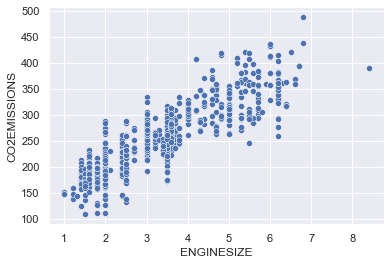

In [6]:
model = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
sb.scatterplot(x='ENGINESIZE', y='CO2EMISSIONS', data=model)
X = model.drop('CO2EMISSIONS', axis=1)
y = model['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print('Accuracy Score:{}'.format(accuracy_score(y_test, y_pred)))
print('Mean Absolute Error:{}'.format(mean_absolute_error(y_test, y_pred)))
print('R2-Score:{}'.format(r2_score(y_test, y_pred)))
print('Residual Sum of Squares:{}'.format(np.sum(np.square(y_pred - y_test))))

Accuracy Score:0.8847352024922118
Mean Absolute Error:3.635514018691589
R2-Score:0.9366033297222559
Residual Sum of Squares:82083


> Function for Polynomial Regression

In [11]:
def PolynomialRegr():
    for i in range(3,6):
        print('For degree = ', i,':-')
        poly = PolynomialFeatures(degree=i, include_bias=False)
        poly_features = poly.fit_transform(X_train)
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y_train)
        poly_test = poly.fit_transform(X_test)
        y_pred2 = poly_reg_model.predict(poly_test)
        print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred2))
        print('R2-Score: ', r2_score(y_test, y_pred2))
        print('Residual Sum of Squares: ', np.sum(np.square(y_pred2 - y_test)))    
        print()

In [12]:
PolynomialRegr()

For degree =  3 :-
Mean Absolute Error:  10.230711579366137
R2-Score:  0.9322474349854114
Residual Sum of Squares:  87722.80578345802

For degree =  4 :-
Mean Absolute Error:  8.250441311790578
R2-Score:  0.9407945298015709
Residual Sum of Squares:  76656.43304304137

For degree =  5 :-
Mean Absolute Error:  8.236270710444908
R2-Score:  0.9424416919331383
Residual Sum of Squares:  74523.7656860158

